In [2]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [5]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.7 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=7402aa40f48835f93d6ec6b813f376ef3117673386e535a82f6677d69822c899
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [6]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3039232/45929032 bytes (6.6%)7233536/45929032 bytes (15.7%)10952704/45929032 bytes (23.8%)14942208/45929032 bytes (32.5%)18857984/45929032 bytes (41.1%)22806528/45929032 bytes (49.7%)26886144/45929032 bytes (58.5%)30990336/45929032 bytes (67.5%)34676736/45929032 bytes (75.5%)37175296/45929032 bytes (80.9%)40656896/45929032 bytes (88.5%)44122112/45929032 bytes (96.1%)

In [8]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1200, 1200
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [9]:
def outcode(x, y):
  x = x  
  y = y
  x_min = -6
  x_max = 6
  y_min = -5
  y_max = 5
  if(x < x_min):
    bit0 = 1
  else:
    bit0 = 0
  if(x > x_max):
    bit1 = 1
  else:
    bit1 = 0
  if(y < y_min):
    bit2 = 1
  else:
    bit2 = 0
  if(y > y_max):
    bit3 = 1
  else:
    bit3 = 0
  return str(bit3) + str(bit2) + str(bit1) + str(bit0)

In [10]:
def cohen_sutherland(x1, y1, x2, y2):
  oc1 = outcode(x1, y1)
  oc2 = outcode(x2, y2)
  oc1Dec = int(oc1, base = 2)
  oc2Dec = int(oc2, base = 2)
  while(True):
    if(oc1 == oc2 == "0000"):
      #completely inside
      gl.glPointSize(5)
      gl.glColor3f(0, .1, 0)

      gl.glBegin(gl.GL_LINES)
      gl.glVertex2f(x1/10, y1/10)
      gl.glVertex2f(x2/10, y2/10)
      gl.glEnd()

      break
    elif(oc1Dec & oc2Dec != 0000):
      #completely outside and clip
      gl.glPointSize(5)
      gl.glColor3f(.1, 0, 0)

      gl.glBegin(gl.GL_LINES)
      gl.glVertex2f(x1/10, y1/10)
      gl.glVertex2f(x2/10, y2/10)
      gl.glEnd()
      break
    else:
      if(oc1 != "0000"):

        gl.glPointSize(5)
        gl.glColor3f(0, 0, .1)

        gl.glBegin(gl.GL_LINES)
        gl.glVertex2f(x1/10, y1/10)
        gl.glVertex2f(x2/10, y2/10)
        gl.glEnd()

        x1, y1 = intersection_point(oc1, x1, y1, x2, y2)
        oc1 = outcode(x1, y1)
      else:

        gl.glPointSize(5)
        gl.glColor3f(0, 0, .1)

        gl.glBegin(gl.GL_LINES)
        gl.glVertex2f(x1/10, y1/10)
        gl.glVertex2f(x2/10, y2/10)
        gl.glEnd()

        x2, y2 = intersection_point(oc2, x1, y1, x2, y2)
        oc2 = outcode(x2, y2)

In [11]:
def intersection_point(outcode, x1, y1, x2, y2):
  x_min = -6
  x_max = 6
  y_min = -5
  y_max = 5
  m = (y2 - y1)/(x2 - x1)
  if(outcode.startswith("1")):
    #Apply Top Intersection
    y = y_max
    x = x1 + ((1/m) * (y_max - y1))
  elif(outcode.startswith("01")):
    #Apply Bottom Intersection
    y = y_min
    x = x1 + ((1/m) * (y_min - y1))
  elif(outcode.endswith("10")):
    #Apply Right Intersection
    x = x_max
    y = y1 + (m * (x_max - x1))
  elif(outcode.endswith("1")):
    #Apply Left Intersection
    x = x_min
    y = y1 + (m * (x_min - x1))
  return x, y


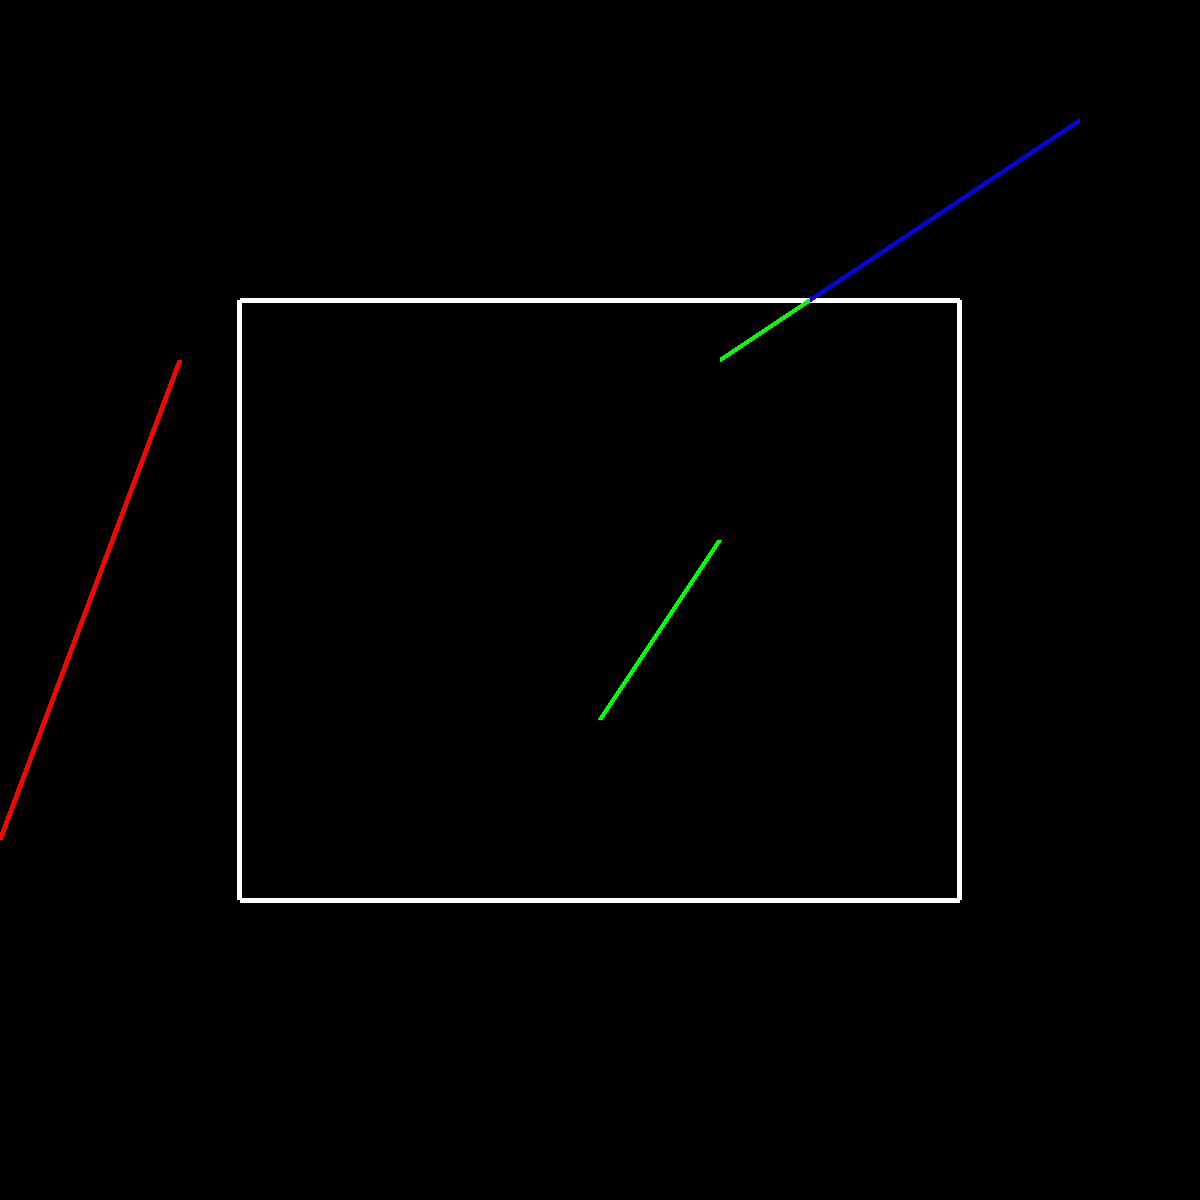

In [12]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#Clipping Window
gl.glLineWidth(5)
gl.glColor3f(.1, .1, .1)

gl.glBegin(gl.GL_LINES)
#ABOVE
gl.glVertex2f(-6/10, 5/10)
gl.glVertex2f(6/10, 5/10)
#BELOW
gl.glVertex2f(-6/10, -5/10)
gl.glVertex2f(6/10, -5/10)
#RIGHT
gl.glVertex2f(6/10, 5/10)
gl.glVertex2f(6/10, -5/10)
#LEFT
gl.glVertex2f(-6/10, 5/10)
gl.glVertex2f(-6/10, -5/10)
gl.glEnd()

#partially accepted
cohen_sutherland(8, 8,  2, 4)
#fully accepted
cohen_sutherland(0, -2,  2, 1)
#fully rejected
cohen_sutherland(-7, 4, -10 , -4)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)